# Script to convert the (forecasted) ghi radiation to dni radiation
# & script to calculate the GlobalTiltedIrradiance



## Import packages and mock data

In [1]:
# packages
import pvlib
from pvlib.location import Location

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cufflinks
cufflinks.go_offline()



In [2]:
# Load one day of forcasted ghi (joule/m^2) Oosterwolde (snippit of a day 2020-06-09)
# convert data (Joule/m^2 to kWh/m^2)

ghi =np.array([81000,
    74700,
    68400,
    62700,
    57000,
    51300,
    45600,
    39900,
    34200,
    28500,
    22800,
    17100,
    11400,
    5700,
    0,
    18300,
    36600,
    54900,
    73200,
    91500,
    109800,
    128100,
    146400,
    164700,
    183000,
    201300,
    219600,
    321300,
    423000,
    524700,
    626400,
    728100,
    829800,
    931500,
    1033200,
    1134900,
    1236600,
    1338300,
    1440000,
    1320000,
    1200000,
    1080000,
    960000,
    840000,
    720000,
    600000,
    480000,
    360000,
    240000,
    120000,
    0,
    153000,
    306000,
    459000,
    612000,
    765000,
    918000,
    1071000,
    1224000,
    1377000,
    1530000,
    1683000,
    1836000,
    1815300,
    1794600,
    1773900,
    1753200,
    1732500,
    1711800,
    1691100,
    1670400,
    1649700,
    1629000,
    1608300,
    1587600,
    1467300,
    1347000,
    1226700,
    1106400,
    986100,
    865800,
    745500,
    625200,
    504900,
    384600,
    264300,
    144000,
    132000,
    120000,
    108000,
    96000,
    84000,
    72000,
    60000,
    48000,
    36000])

ghi = ghi/3600 #J/m^2 to kWh/m^2

## converter from GHI (radiation) to dni


In [3]:
def ghi2dni(ghi_forecasted,loc):
    
    times = ghi_forecasted.index
    # calculate data for loc(ation) at times with clear_sky
    cs = loc.get_clearsky(times)
    dhi_calc = cs.dhi
    dni_calc = cs.dni
    ghi_calc = cs.ghi

    # get solar position variable(s) for loc(ation) at times
    solpos = pvlib.solarposition.get_solarposition(times, loc.latitude, loc.longitude)
    solar_zenith = solpos.apparent_zenith

    # convert ghi to dni 
    dni_converted = pvlib.irradiance.dni(ghi_forecasted, dhi_calc, solar_zenith, clearsky_dni=dni_calc)
    return dni_converted

In [4]:
lon = 52.98749605 
lat = 6.288165514

loc = Location(lat, lon, tz='CET', altitude=0, name='Oosterwolde')

times =pd.date_range(start = "2020-06-09 00:00:00",end = "2020-06-09 23:45:00",freq='15min',tz='Europe/Amsterdam')
radiation = pd.DataFrame({'ghi_forecasted': ghi},
                        index=times)

In [5]:
dni_converted = ghi2dni(radiation['ghi_forecasted'],loc)


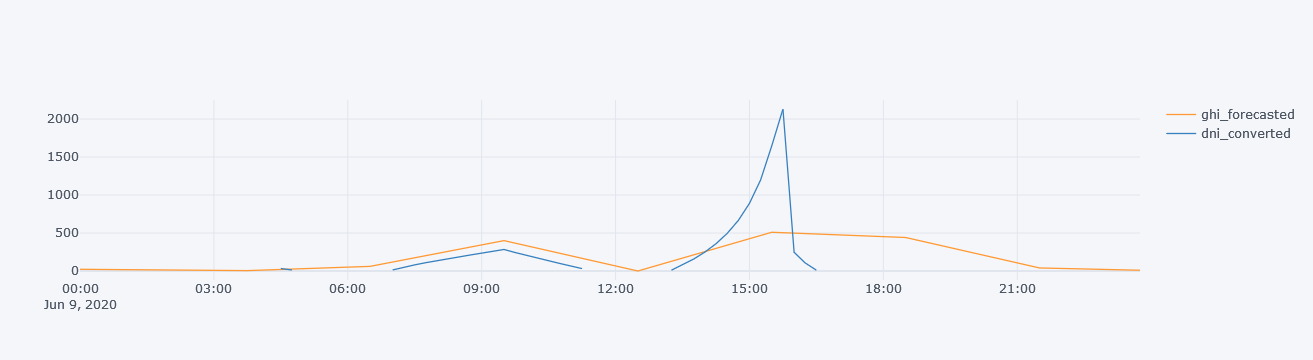

In [6]:
# Plotting the dni compared to ghi_forcasted
radiation['dni_converted'] = dni_converted
radiation.iplot()

## Script to calculate the GlobalTiltIrradiance


In [1]:
None